In [1]:
import pickle
from pprint import pprint
import copy
import numpy as np
import os
import ast
import pandas as pd

In [2]:
LOGDIR = "sensi_logs/sweep-high_std-g_LL_prime_combined/2021_07_04_T_23_10_10/"

In [3]:
logfile = os.path.join(LOGDIR, "model_learn.log")
with open(logfile, "r") as f:
    log = f.readlines()

In [4]:
params_names = [
    item for sublist in (ast.literal_eval(log[3].strip("\n"))) for item in sublist
]
print(params_names)

[['Q1', 'freq']]


In [5]:
data_list_dict = list()
for line in log[9:]:
    if line[0] == "{":
        temp_dict = ast.literal_eval(line.strip("\n"))
        for index, param_name in enumerate(params_names):
            temp_dict[param_name[0]] = temp_dict["params"][index]
        temp_dict.pop("params")
        data_list_dict.append(temp_dict)

In [6]:
data_df = pd.DataFrame(data_list_dict)

In [7]:
from  matplotlib import rcParams
import matplotlib.pyplot as plt 

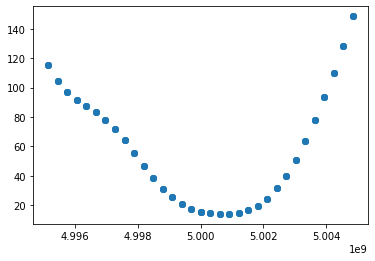

In [8]:
plt.scatter(data_df["Q1"], data_df["goal"])